In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
MAX_PEOPLE = 10000000
MAX_IN_GROUP = 50
GROUP_STEP = 1
EPS = 10

In [70]:
def make_trials(max_k_len=MAX_IN_GROUP, step=GROUP_STEP, N_len=MAX_PEOPLE, sick_ver=np.linspace(0, 1, 20), seed=19):
    np.random.seed(seed)
    results = {}
    for ver in sick_ver:
        results[ver] = []
        for k_len in np.arange(0, max_k_len + step, step)[1:]:
            counter = 0
            tmp = 0
            while tmp < N_len:
                flag = False
                for _ in range(k_len):
                    value = np.random.random()
                    if value <= ver:
                        flag = True
                        break
                if flag:
                    counter += k_len + 1
                else:
                    counter += 1
                tmp += k_len
            results[ver].append((k_len, counter))
                
    return results
    

def create_subplots(trial_results, max_k_len=MAX_IN_GROUP, N_len=MAX_PEOPLE):
    _, ax = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))
    plt.subplots_adjust(hspace=0.3)
    for index, key in enumerate(trial_results.keys()):
        k, values = list(zip(*trial_results[key]))
        min_value = min(values)
        min_k = k[values.index(min_value)]
        ax[index // 4, index % 4].set_ylim(0, N_len * 1.3)
        ax[index // 4, index % 4].set_xlim(1, max_k_len)
        ax[index // 4, index % 4].set_title(str(key) + "\ncount: "+ str(min_value) + " | k: " + str(min_k))
        sns.lineplot(k, values, ax=ax[index // 4, index % 4])
        sns.scatterplot([min_k], [min_value], ax=ax[index // 4, index % 4], color="r")

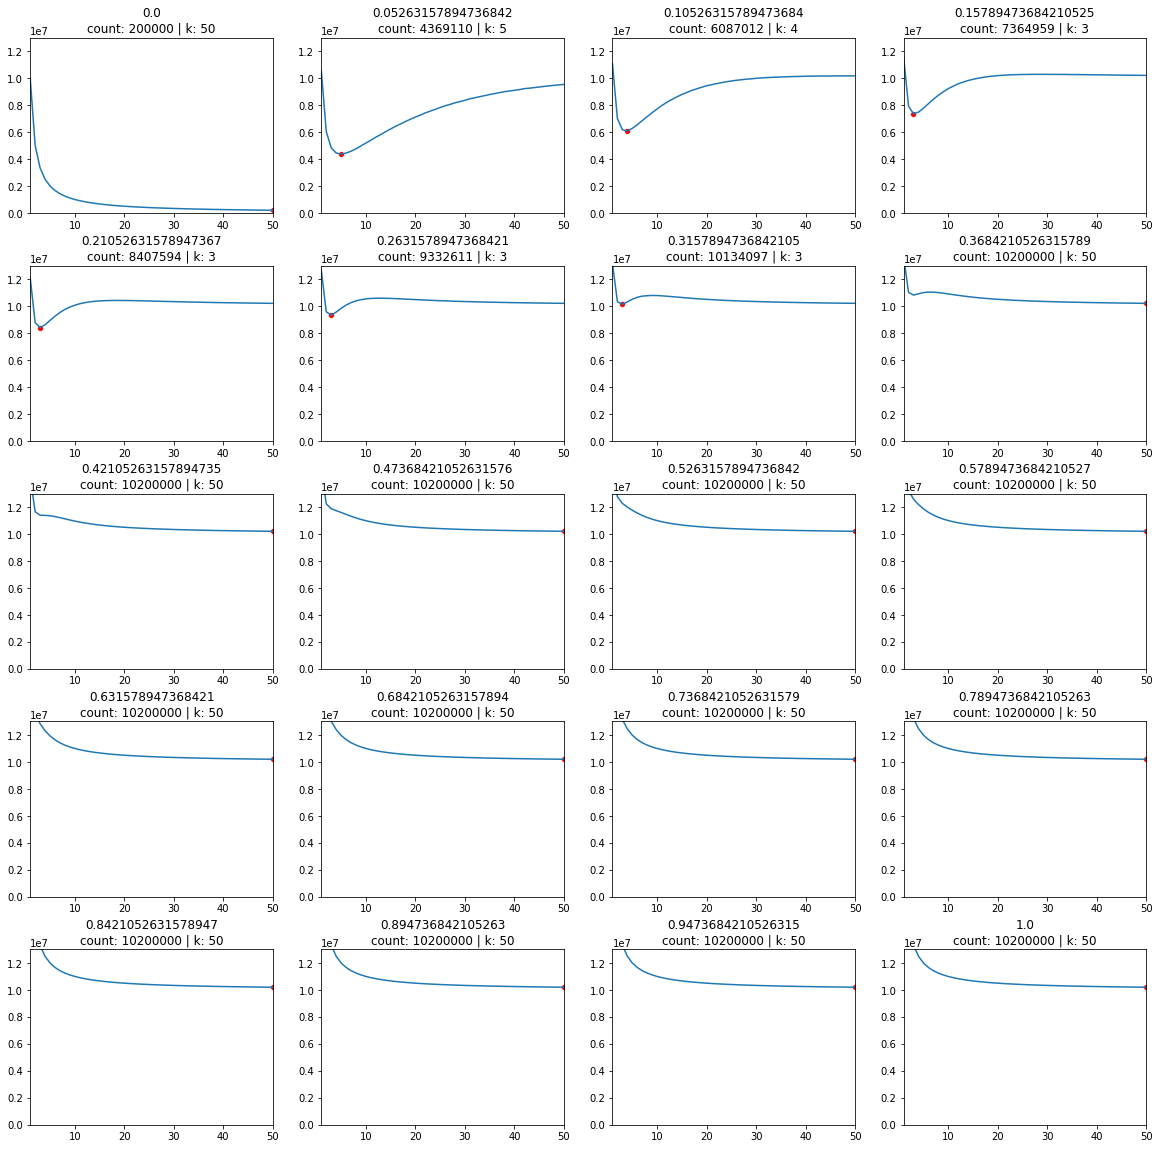

In [4]:
trial_results = make_trials() 
create_subplots(trial_results)

In [64]:
def rent_an(N_len, sick_ver=np.linspace(0, 1, 20)):
    delta = np.inf
    max_result = int()
    while abs(delta) > EPS:
        results = make_trials(N_len=N_len, sick_ver=sick_ver)
        min_ver, max_ver = 0, 1
        delta_min, delta_max = int(), N_len 
        for index, key in enumerate(results.keys()):
            k, values = list(zip(*results[key]))
            if all(map(lambda x: x > N_len, values)):
                min_ver, max_ver = sick_ver[index - 1], sick_ver[index]
                delta_min = min(values)
                max_result = sick_ver[index]
                break
        sick_ver=np.linspace(min_ver, max_ver, 20)
        delta = delta_max - delta_min
    return max_result

In [66]:
rent_an(100000)

0.30616707974923457

In [82]:
def create_ver_vis(trial_results, k=0, max_k_len=MAX_IN_GROUP, N_len=MAX_PEOPLE):
    ver, res = [], [] 
    k = 
    for index, key in enumerate(trial_results.keys()):
        _, values = list(zip(*trial_results[key]))
        ver.append(key)
        res.append(values[k])
    sns.lineplot(ver, res)
    sns.scatterplot([ver[res.index(min(res))]], [min(res)], color="r")

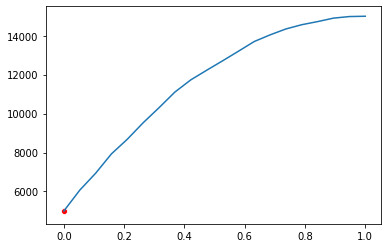

In [83]:
trial_results = make_trials(N_len=10000)
create_ver_vis(trial_results, k=1, N_len=10000)